<a href="https://colab.research.google.com/github/Castillo-jacqueline/Metodos-numericos-/blob/main/Polinomio_de_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolación de Hermite
Ingrese el número de puntos: 2

Ingrese los valores de la tabla:
x[0]: -2
f(x[0]): -12
x[1]: 1
f(x[1]): 9

¿Conoces las derivadas f'(x)? (s/n): S
f'(x[0]): 22
f'(x[1]): 10

Polinomio de Hermite:
-4.11111111111111*x**3 - 5.0*x**2 + 29.3333333333333*x + 33.7777777777778


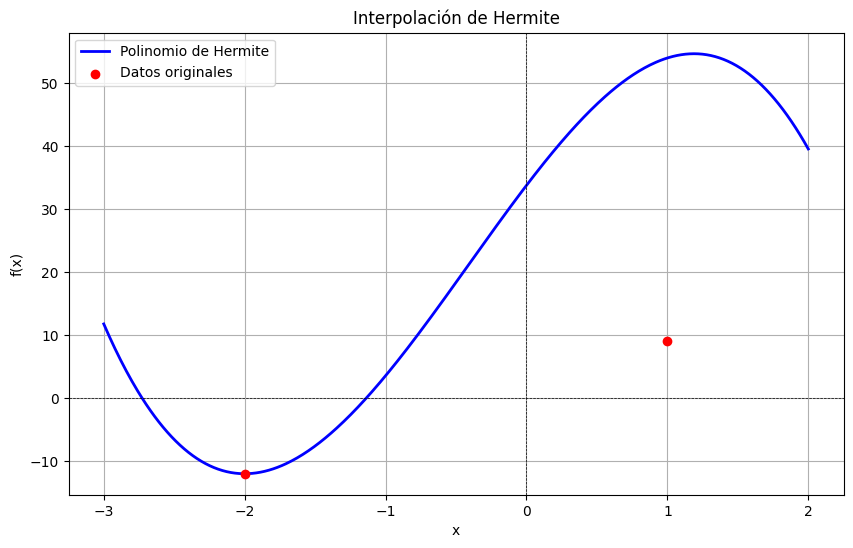

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def hermite_interpolation(x_data, y_data, dy_data=None):
    """
    Calcula el polinomio de interpolación osculante de Hermite para los datos dados.

    Args:
        x_data (list): Puntos x de la tabla.
        y_data (list): Valores f(x) correspondientes a x_data.
        dy_data (list, optional): Derivadas f'(x) correspondientes a x_data.
                                   Si no se proporcionan, se asumen derivadas nulas.

    Returns:
        sp.Expr: El polinomio de interpolación de Hermite.
    """
    n = len(x_data)
    x = sp.symbols('x')  # Variable simbólica
    z = []  # Lista para almacenar los nodos repetidos
    Q = []  # Tabla dividida de diferencias

    # Crear nodos repetidos
    for i in range(n):
        z.append(x_data[i])
        z.append(x_data[i])

    # Inicializar la tabla de diferencias divididas con f(x) y f'(x)
    Q = [[0] * (2 * n) for _ in range(2 * n)]
    for i in range(n):
        Q[2 * i][0] = y_data[i]
        Q[2 * i + 1][0] = y_data[i]
        Q[2 * i + 1][1] = dy_data[i] if dy_data else 0
        if i > 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    # Completar el resto de la tabla
    for j in range(2, 2 * n):
        for i in range(2 * n - j):
            Q[i][j] = (Q[i + 1][j - 1] - Q[i][j - 1]) / (z[i + j] - z[i])

    # Construir el polinomio
    P = Q[0][0]
    for i in range(1, 2 * n):
        term = Q[0][i]
        for j in range(i):
            term *= (x - z[j])
        P += term

    return sp.expand(P)


def plot_hermite_polynomial(x_data, y_data, polynomial, points=500):
    """
    Grafica el polinomio de Hermite junto con los datos originales.

    Args:
        x_data (list): Puntos x de la tabla.
        y_data (list): Valores f(x) correspondientes a x_data.
        polynomial (sp.Expr): Polinomio de Hermite.
        points (int): Número de puntos para evaluar el polinomio en la gráfica.
    """
    x = sp.symbols('x')
    f = sp.lambdify(x, polynomial, modules=["numpy"])

    # Generar puntos para la gráfica
    x_vals = np.linspace(min(x_data) - 1, max(x_data) + 1, points)
    y_vals = f(x_vals)

    # Graficar el polinomio
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="Polinomio de Hermite", color='blue', linewidth=2)

    # Graficar los puntos originales
    plt.scatter(x_data, y_data, color='red', label="Datos originales", zorder=5)

    # Formato del gráfico
    plt.title("Interpolación de Hermite")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()


# Programa principal
if __name__ == "__main__":
    print("Interpolación de Hermite")
    n = int(input("Ingrese el número de puntos: "))

    x_data = []
    y_data = []
    dy_data = []

    print("\nIngrese los valores de la tabla:")
    for i in range(n):
        x = float(input(f"x[{i}]: "))
        y = float(input(f"f(x[{i}]): "))
        x_data.append(x)
        y_data.append(y)

    derivadas = input("\n¿Conoces las derivadas f'(x)? (s/n): ").strip().lower()
    if derivadas == 's':
        for i in range(n):
            dy = float(input(f"f'(x[{i}]): "))
            dy_data.append(dy)
    else:
        dy_data = None

    # Calcular el polinomio de Hermite
    hermite_poly = hermite_interpolation(x_data, y_data, dy_data)
    print("\nPolinomio de Hermite:")
    print(hermite_poly)

    # Graficar el polinomio y los datos originales
    plot_hermite_polynomial(x_data, y_data, hermite_poly)